In [2]:
import pandas as pd
from datetime import timedelta, datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

import warnings
warnings.filterwarnings("ignore")


from sklearn.metrics import mean_squared_error
from math import sqrt

%matplotlib inline
from pandas.plotting import register_matplotlib_converters

from statsmodels.tsa.api import Holt

In [3]:
def get_airbnb_data():
    df = df = pd.read_csv('Listings.csv',encoding='ISO-8859-1')
    return df

In [4]:
df=get_airbnb_data()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   listing_id                   279712 non-null  int64  
 1   name                         279539 non-null  object 
 2   host_id                      279712 non-null  int64  
 3   host_since                   279547 non-null  object 
 4   host_location                278872 non-null  object 
 5   host_response_time           150930 non-null  object 
 6   host_response_rate           150930 non-null  float64
 7   host_acceptance_rate         166625 non-null  float64
 8   host_is_superhost            279547 non-null  object 
 9   host_total_listings_count    279547 non-null  float64
 10  host_has_profile_pic         279547 non-null  object 
 11  host_identity_verified       279547 non-null  object 
 12  neighbourhood                279712 non-null  object 
 13 

In [6]:
df.host_response_rate.unique()

array([ nan, 1.  , 0.  , 0.5 , 0.67, 0.9 , 0.86, 0.83, 0.8 , 0.75, 0.88,
       0.79, 0.89, 0.94, 0.71, 0.95, 0.3 , 0.25, 0.6 , 0.33, 0.43, 0.2 ,
       0.84, 0.4 , 0.92, 0.17, 0.97, 0.87, 0.38, 0.7 , 0.58, 0.76, 0.78,
       0.44, 0.91, 0.1 , 0.14, 0.57, 0.56, 0.05, 0.77, 0.98, 0.96, 0.93,
       0.72, 0.29, 0.63, 0.11, 0.68, 0.69, 0.81, 0.82, 0.73, 0.85, 0.46,
       0.22, 0.99, 0.23, 0.13, 0.36, 0.12, 0.47, 0.55, 0.06, 0.08, 0.09,
       0.62, 0.65, 0.64, 0.28, 0.53, 0.39, 0.59, 0.41, 0.27, 0.31, 0.74,
       0.03, 0.52, 0.04, 0.54, 0.61, 0.21, 0.07, 0.45, 0.42, 0.51, 0.48,
       0.19, 0.15, 0.01, 0.24])

In [7]:
df.head()


,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [8]:
df = df.drop(['name','latitude','longitude','district','host_location'], axis=1)


In [9]:
df.head()

,listing_id,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,1466919,2011-12-03,NaN,NaN,NaN,f,1.0,t,f,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,10328771,2013-11-29,NaN,NaN,NaN,f,1.0,t,t,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,19252768,2014-07-31,NaN,NaN,NaN,f,1.0,t,f,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,10668311,2013-12-17,NaN,NaN,NaN,f,1.0,t,t,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,24837558,2014-12-14,NaN,NaN,NaN,f,1.0,t,f,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [10]:
df.head()

,listing_id,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,1466919,2011-12-03,NaN,NaN,NaN,f,1.0,t,f,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,10328771,2013-11-29,NaN,NaN,NaN,f,1.0,t,t,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,19252768,2014-07-31,NaN,NaN,NaN,f,1.0,t,f,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,10668311,2013-12-17,NaN,NaN,NaN,f,1.0,t,t,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,24837558,2014-12-14,NaN,NaN,NaN,f,1.0,t,f,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [11]:
df=df.dropna()

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93324 entries, 26273 to 271185
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   listing_id                   93324 non-null  int64  
 1   host_id                      93324 non-null  int64  
 2   host_since                   93324 non-null  object 
 3   host_response_time           93324 non-null  object 
 4   host_response_rate           93324 non-null  float64
 5   host_acceptance_rate         93324 non-null  float64
 6   host_is_superhost            93324 non-null  object 
 7   host_total_listings_count    93324 non-null  float64
 8   host_has_profile_pic         93324 non-null  object 
 9   host_identity_verified       93324 non-null  object 
 10  neighbourhood                93324 non-null  object 
 11  city                         93324 non-null  object 
 12  property_type                93324 non-null  object 
 13  room_type  

In [13]:
ammenities_price_df=df.drop(['host_since',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_total_listings_count',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood','review_scores_rating','review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value'], axis=1)
ammenities_review=df.drop(['host_since',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_total_listings_count',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood','review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value'], axis=1)
host_review=df.drop(['neighbourhood',
 'city',
 'property_type',
 'room_type',
 'accommodates',
 'bedrooms',
 'amenities',
 'price',
 'minimum_nights',
 'maximum_nights',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'instant_bookable'], axis=1)


In [14]:
ammenities_price_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93324 entries, 26273 to 271185
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   listing_id        93324 non-null  int64  
 1   host_id           93324 non-null  int64  
 2   city              93324 non-null  object 
 3   property_type     93324 non-null  object 
 4   room_type         93324 non-null  object 
 5   accommodates      93324 non-null  int64  
 6   bedrooms          93324 non-null  float64
 7   amenities         93324 non-null  object 
 8   price             93324 non-null  int64  
 9   minimum_nights    93324 non-null  int64  
 10  maximum_nights    93324 non-null  int64  
 11  instant_bookable  93324 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 9.3+ MB


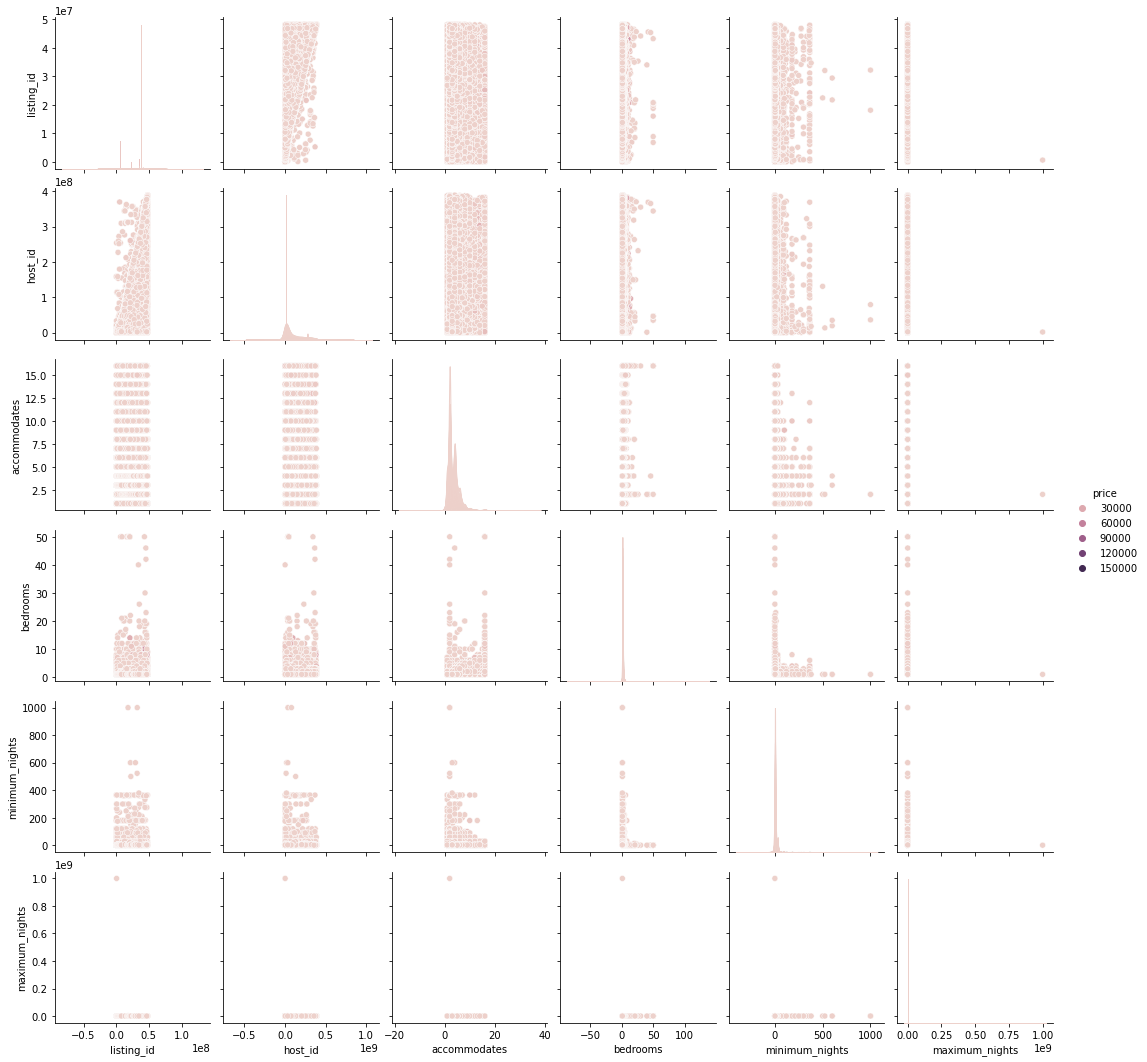

In [18]:
sns.pairplot(ammenities_price_df, hue="price")

In [22]:
dummies = ammenities_price_df["amenities"].str.get_dummies(",")


In [23]:
dummies

,""" Amenities Realgem\u2019s -Talentos do Brasil Feita a base de mel",""" Bottom Freezer Fridge Inox refrigerator""",""" IKEA - SYMFONISK Table lamp with WiFi speaker (Sonos) sound system""",""" c/ Congelador Separado refrigerator""","""100\"" HDTV with Netflix","""100\"" HDTV with Netflix""","""101\"" HDTV with Netflix""","""105\"" HDTV with Apple TV","""106\"" HDTV with Netflix","""107\"" HDTV with Amazon Prime Video",...,"[""bosch refrigerator""","[""candy stainless steel oven""","[""cheapo body soap""","[""enviro care body wash silicone free body soap""","[""local PA (see Photo) sound system with aux""","[""mabe de 29 pies refrigerator""","[""mabe stainless steel gas stove""","[""samsung Bluetooth sound system""",[],"body wash and conditioner silicone free shampoo"""
26273,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26274,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26275,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26276,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26277,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271181,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
271182,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
271183,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
271184,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
dummies['total'] = dummies.sum(axis=1, numeric_only= True)

dummies


,""" Amenities Realgem\u2019s -Talentos do Brasil Feita a base de mel",""" Bottom Freezer Fridge Inox refrigerator""",""" IKEA - SYMFONISK Table lamp with WiFi speaker (Sonos) sound system""",""" c/ Congelador Separado refrigerator""","""100\"" HDTV with Netflix","""100\"" HDTV with Netflix""","""101\"" HDTV with Netflix""","""105\"" HDTV with Apple TV","""106\"" HDTV with Netflix","""107\"" HDTV with Amazon Prime Video",...,"[""candy stainless steel oven""","[""cheapo body soap""","[""enviro care body wash silicone free body soap""","[""local PA (see Photo) sound system with aux""","[""mabe de 29 pies refrigerator""","[""mabe stainless steel gas stove""","[""samsung Bluetooth sound system""",[],"body wash and conditioner silicone free shampoo""",total
26273,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,16
26274,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,21
26275,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,19
26276,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,31
26277,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271181,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,21
271182,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,18
271183,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,30
271184,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,14


In [25]:
dummies=dummies.total

In [26]:
dummies


26273     16
26274     21
26275     19
26276     31
26277     38
          ..
271181    21
271182    18
271183    30
271184    14
271185    18
Name: total, Length: 93324, dtype: int64

In [27]:
ammenities_price_df = ammenities_price_df.join(dummies)


In [28]:
ammenities_price_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93324 entries, 26273 to 271185
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   listing_id        93324 non-null  int64  
 1   host_id           93324 non-null  int64  
 2   city              93324 non-null  object 
 3   property_type     93324 non-null  object 
 4   room_type         93324 non-null  object 
 5   accommodates      93324 non-null  int64  
 6   bedrooms          93324 non-null  float64
 7   amenities         93324 non-null  object 
 8   price             93324 non-null  int64  
 9   minimum_nights    93324 non-null  int64  
 10  maximum_nights    93324 non-null  int64  
 11  instant_bookable  93324 non-null  object 
 12  total             93324 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 12.0+ MB


In [35]:
ammenities_price_df.total.min()


1

In [37]:
ammenities_price_df.amenities.str.len()


26273     231
26274     305
26275     285
26276     555
26277     650
         ... 
271181    295
271182    254
271183    463
271184    177
271185    258
Name: amenities, Length: 93324, dtype: int64

In [ ]:
def split_data(df):
    '''
    Takes in a dataframe and target (as a string). Returns train, validate, and test subset 
    dataframes with the .2/.8 and .25/.75 splits to create a final .2/.2/.6 split between datasets
    '''
    # split the data into train and test. 
    train, test = train_test_split(df, test_size = .2, random_state=123)
    
    # split the train data into train and validate
    train, validate = train_test_split(train, test_size = .25, random_state=123)
    
    return train, validate, 